In [1]:
from tensorflow.keras import layers

In [2]:
import tensorflow as tf

In [3]:
def conv_block(input , num_filters ) : 
  x = tf.keras.layers.Conv2D(num_filters , 3 , padding="same")(input)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation("relu")(x)

  x = tf.keras.layers.Conv2D(num_filters , 3 , padding="same")(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation("relu")(x)
  return x 

In [4]:
def encoder(input , num_filter) : 
  s = conv_block(input , num_filter)
  p = tf.keras.layers.MaxPool2D((2,2))(s)
  return s , p 

In [5]:
def decoder(input , skip_conn , num_filter): 
  x = tf.keras.layers.Conv2DTranspose(num_filter , (2,2) , strides=2 , padding="same")(input)
  x = tf.keras.layers.Concatenate()([x , skip_conn])
  x = conv_block(x , num_filter)
  return x 

In [6]:
inputs = tf.keras.Input(shape=(128,128,3))

In [7]:
s1 , p1 = encoder(inputs ,64)
s2 , p2 = encoder(p1 , 128)
s3 , p3 = encoder(p2 , 256)
s4 , p4 = encoder(p3 , 512)

b1 = conv_block(p4 , 1024)

d1 = decoder(b1 , s4 , 512)
d2 = decoder(d1 ,s3 ,256)
d3 = decoder(d2 , s2 , 128)
d4 = decoder(d3 , s1 , 64)

In [8]:
outputs = tf.keras.layers.Conv2D(3,3,padding="same" , activation="sigmoid")(d4)

In [9]:
model = tf.keras.Model(inputs , outputs)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

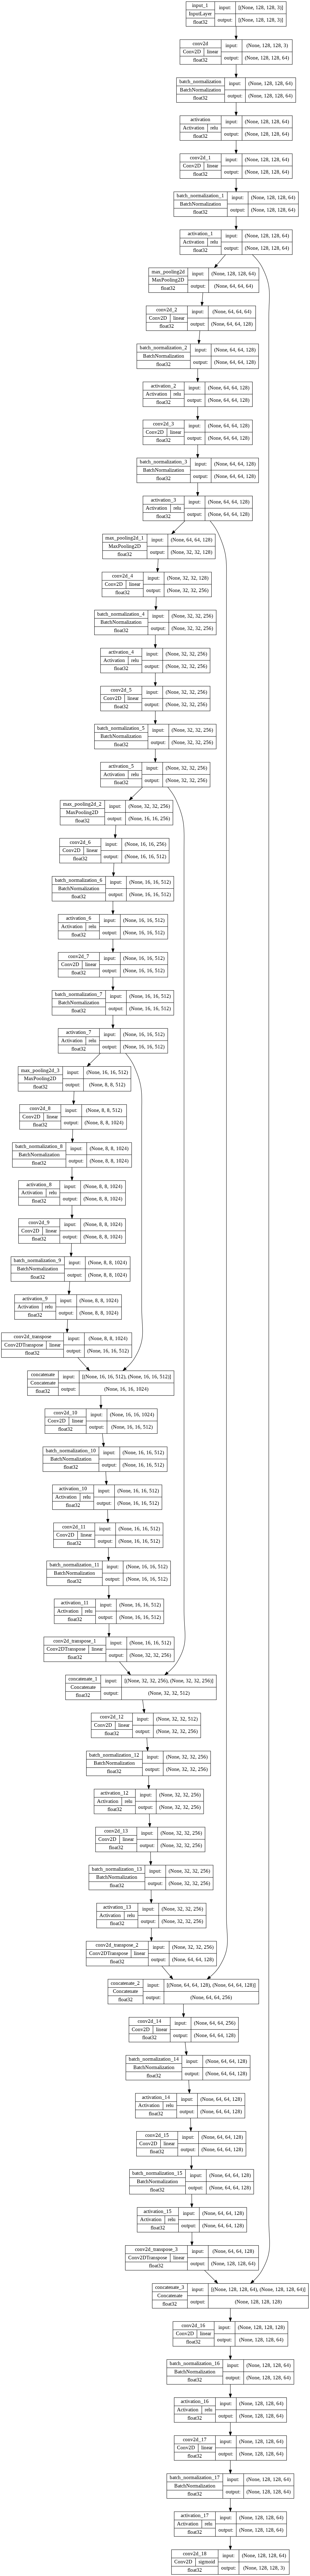

In [11]:
tf.keras.utils.plot_model(model , show_dtype=True , show_layer_activations=True , show_shapes=True)